<a href="https://colab.research.google.com/github/rahiakela/deep-learning-research-and-practice/blob/main/math-and-architectures-of-deep-learning/introduction-to-vectors-matrices-and-tensors/04_matrix_diagonalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Matrix Diagonalization

Consider a $n \times n$ matrix $A_{n, n}$ with $n$ linearly independent eigenvectors.

Let $S_{n,n}$ be a matrix with these eigenvectors as its columns.

$$Ae_1 = \lambda_1e_1$$
$$Ae_2 = \lambda_2e_2$$
$$... = ...$$
$$Ae_n = \lambda_ne_n$$

And,

$$
S = 
\begin{bmatrix}
        e_1 & e_2 & ... & e_n \\
\end{bmatrix}
$$

Then,

$$
AS = 
A \begin{bmatrix}
        e_1 & e_2 & ... & e_n \\
\end{bmatrix}
=
\begin{bmatrix}
        Ae_1 & Ae_2 & ... & Ae_n \\
\end{bmatrix}
=
\begin{bmatrix}
        \lambda_1e_1 & \lambda_2e_2 & ... & \lambda_ne_n \\
\end{bmatrix}
=
\begin{bmatrix}
        e_1 & e_2 & ... & e_n \\
\end{bmatrix}
\begin{bmatrix}
        \lambda_1 & 0 & ... & 0 \\
        0 & \lambda_2 & ... & 0 \\
        ... & ... & ... \\
        ... & ... & ... \\
        0 & 0 & ... & \lambda_n \\
\end{bmatrix}
=S\Sigma
$$

Where,

$$
\Sigma = \begin{bmatrix}
        \lambda_1 & 0 & ... & 0 \\
        0 & \lambda_2 & ... & 0 \\
        ... & ... & ... \\
        ... & ... & ... \\
        0 & 0 & ... & \lambda_n \\
\end{bmatrix}
$$

is a diagonal matrix with the eigenvalues of $A$ on the diagonal and 0 everywhere else.

Thus, we have

$$AS = S\Sigma$$

Which lead to,

$$A=S\Sigma S^{-1}$$

and,

$$\Sigma = S^{-1}AS$$

If $A$ is symmetric, then its eigenvectors are orthogonal. Then

$$S^TS = SS^T = I$$

So, 

$$S^{-1}=S^T$$

and we get the diagonalization of $A$.

$$
A = S \Sigma S^T
$$

##Setup

In [1]:
import torch
import torch.linalg as LA

import numpy as np
import math
from math import cos, sin, radians
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

In [2]:
torch.manual_seed(42)

##Numpy matrix diagonalization

Let us reconsider our rotation matrix.

In [3]:
def diagonalise(matrix):
  """
  np.linalg.eig(matrix) returns the eigenvalues of matrix in an array (first return value) 
  and the eigvectors as a matrix (each column is an eigenvector)
  """
  try:
    l, e = torch.linalg.eig(matrix)
    # make a diagonal matrix from the eigenvalues
    sigma = torch.diag(l)
    # return the three factor matrices
    return e, torch.diag(l), torch.linalg.inv(e)
  except RuntimeError:
    print("Cannot diagonalise matrix!")

In [4]:
A = torch.tensor([
  [0.7071, 0.7071, 0],
  [-0.7071, 0.7071, 0],
  [0, 0, 1]
])
print(f"A: \n{A}")

S, sigma, S_inv = diagonalise(A)

# Let us reconstruct the original matriox from its factors
A1 = torch.matmul(S, torch.matmul(sigma, S_inv))
print(f"\nS =\n{S}")
print(f"\nsigma =\n{sigma}")
print(f"\nS_inv =\n{S_inv}")
print(f"\nS sigmaa S_inv =\n{A1}")

A: 
tensor([[ 0.7071,  0.7071,  0.0000],
        [-0.7071,  0.7071,  0.0000],
        [ 0.0000,  0.0000,  1.0000]])

S =
tensor([[0.7071+0.0000j, 0.7071-0.0000j, 0.0000+0.0000j],
        [0.0000+0.7071j, 0.0000-0.7071j, 0.0000+0.0000j],
        [0.0000+0.0000j, 0.0000-0.0000j, 1.0000+0.0000j]])

sigma =
tensor([[0.7071+0.7071j, 0.0000+0.0000j, 0.0000+0.0000j],
        [0.0000+0.0000j, 0.7071-0.7071j, 0.0000+0.0000j],
        [0.0000+0.0000j, 0.0000+0.0000j, 1.0000+0.0000j]])

S_inv =
tensor([[0.7071+0.0000j, 0.0000-0.7071j, 0.0000-0.0000j],
        [0.7071+0.0000j, 0.0000+0.7071j, 0.0000+0.0000j],
        [0.0000+0.0000j, 0.0000+0.0000j, 1.0000+0.0000j]])

S sigmaa S_inv =
tensor([[ 0.7071+5.9605e-08j,  0.7071+5.9605e-08j,  0.0000+0.0000e+00j],
        [-0.7071+5.9605e-08j,  0.7071-5.9605e-08j,  0.0000+0.0000e+00j],
        [ 0.0000+0.0000e+00j,  0.0000+0.0000e+00j,  1.0000+0.0000e+00j]])


We assert that the original matrix is the same as the reconstruction from the diagonal decomposition factors.

In [5]:
assert torch.allclose(A, A1.real)

##Linear Systems with Diagonalization

In general,
matrix inversion (i.e., computation of $A^{-1}$ is a very complex process which is numerically
unstable. 

Hence, solving $Ax = b$ via $x = A^{-1}b$ is to be avoided when possible.

In the particular case of a square symmetric matrix with n distinct eigenvalues, diagonalization can come to the rescue. 

We can solve in multiple steps: 

We first diagonalize $A$

$$
A = S\Lambda S^T
$$

Then,

$$Ax=b$$

can be written as:

$$A = S\Lambda S^Tx=b$$

where $S$ is the matrix with eigenvectors of $A$ as its columns:

$$
S = 
\begin{bmatrix}
        e_1 & e_2 & ... & e_n \\
\end{bmatrix}
$$

Since $A$ is symmetric, these eigenvectors are orthogonal. Hence $S^TS=SS^T=I$.

The solution can be obtained in a series of very simple steps as shown below:

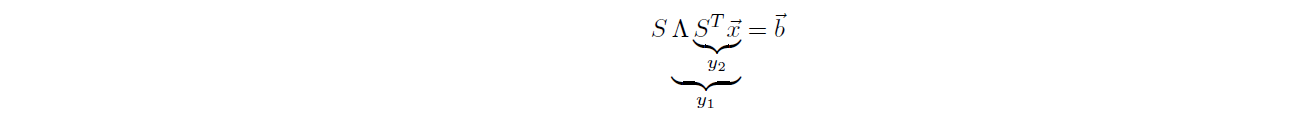


Let's first solve,

$$Sy_1=b$$

as

$$y1=S^Tb$$

Notice that both transpose and matrix vector multiplications are simple and numerically
stable operations unlike matrix inversion. 

Then we get,

$$\Lambda (S^Tx) = y_1$$

Now solve,

$$\Lambda y_2 = y_1$$

as

$$y_2 = \Lambda^{-1} y_1$$

Note that since $\Lambda$ is a diagonal matrix, inverting it is trivial,

$$
\begin{bmatrix}
        \lambda_1 & 0 & ... & 0 \\
        0 & \lambda_2 & ... & 0 \\
        ... & ... & ... \\
        ... & ... & ... \\
        0 & 0 & ... & \lambda_n \\
\end{bmatrix}^{-1}
=
\begin{bmatrix}
        \frac{1}{\lambda_1} & 0 & ... & 0 \\
        0 & \frac{1}{\lambda_2} & ... & 0 \\
        ... & ... & ... \\
        ... & ... & ... \\
        0 & 0 & ... & \frac{1}{\lambda_n} \\
\end{bmatrix}
$$

As final step, solve,

$$S^Tx=y_2$$

as

$$x=Sy_2$$

Thus we have obtained $x$ without a single complex or unstable step.

Now, let us try solving the following set of equations:

\begin{align*}
    x + 2y + z    &= 8 \\
    2x + 2y + 3z &= 15 \\
    x + 3y + 3z  &= 16
\end{align*}

This can be written using matrices and vectors as
\begin{equation*}
A\vec{x} = \vec{b}
\end{equation*}
where $A=
\begin{bmatrix}
        1 & 2 & 1 \\
        2 & 2 & 3 \\
        1 & 3 & 3 
\end{bmatrix}
\;\;\;\;\;\;
\vec{x} = 
\begin{bmatrix}
        x \\
        y \\
        z 
\end{bmatrix}
\;\;\;\;\;\;
\vec{b} = 
\begin{bmatrix}
        8 \\
        15 \\
        16
\end{bmatrix}$


Note that $A$ is a symmetric matrix. It has orthogonal eigenvectros.
<br> The matrix with eigenvectors of $A$ in columns is orthogonal.
<br> Its transpose and inverse are same.

In [9]:
A = np.array([
  [1, 2, 1],
  [2, 2, 3],
  [1, 3, 3]
])

# since it is symmetric matrix
assert np.all(A == A.T)

b = np.array([8, 15, 16])

# One way to solve for this is to compute matrix inverse i.e x = A_inv b
x_0 = np.matmul(np.linalg.inv(A), b)
print(f"Solution using inverse: {x_0}")

# Matrix inversion is a complex process that can be
# numerically unstable. If possible we use diagonalisation.
w, S = np.linalg.eig(A)

# We know that A = S sigma S_inv, so S sigma S_inv x = b
# sigma S_inv x =  S_inv b  ==> sigma S_inv x = S_t b
S_inv_b = np.matmul(S.T, b)

# => S_inv x = sigma_inv(S_t b)
# Since inversion of the diagonal matrix is just division of all elements by 1, we can compute sigma_inv as follows
sigma_inv = np.diag(1/w)
sigma_inv_S_inv_b = np.matmul(sigma_inv, S_inv_b)

# => x = S (sigma_inv(S_t b))
x_1 = np.matmul(S, sigma_inv_S_inv_b)
print(f"Solution using diagonalisation: {x_1}")

assert np.allclose(x_0, x_1)

Solution using inverse: [1. 2. 3.]
Solution using diagonalisation: [1. 2. 3.]


##Matrix powers using diagonalization

A matrix $R$ is orthogonal if and only if it its transpose is also its inverse, i.e., $R^TR = RR^T =  I$.

All rotations matrices are orthogonal matrices. All orthogonal matrices represent some rotation.

For instance:

$$
\begin{bmatrix}
        cos\theta & -sin\theta \\
        sin\theta & cos\theta \\
\end{bmatrix}^T 
\begin{bmatrix}
        cos\theta & -sin\theta \\
        sin\theta & cos\theta \\
\end{bmatrix}
=
\begin{bmatrix}
        cos\theta & sin\theta \\
        -sin\theta & cos\theta \\
\end{bmatrix}^T 
\begin{bmatrix}
        cos\theta & -sin\theta \\
        sin\theta & cos\theta \\
\end{bmatrix}
=
\begin{bmatrix}
        cos^2\theta + sin^2\theta & 0 \\
        0 & cos^2\theta + sin^2\theta \\
\end{bmatrix}
=
\begin{bmatrix}
        1 & 0 \\
        0 & 1 \\
\end{bmatrix}
=I
$$

**Orthogonality implies rotation is length preserving**

Lengths (magnitudes) of the 2 vectors $x, y$ are equal, since it is easy to see that:

$$
||y|| = y^Ty = (Rx)^T(Rx) = x^TR^TRx = x^TIx = x^Tx = ||x||
$$

Since we know that $(AB)^T = B^TA^T$

In [ ]:
R_30 = rotation_matrix_2d(30)
print(f"Matrix to rotate in-plane by 30 degrees about origin:\n{R_30}")

# Inverse of rotation matrix is same as the transpose, this is orthogonality.
assert torch.allclose(torch.linalg.inv(R_30), R_30.T)

# Equivalently, if we multiply a rotation matrix and its transpose, we get the identity matrix.
assert torch.allclose(torch.matmul(R_30, R_30.T), torch.eye(2))

Matrix to rotate in-plane by 30 degrees about origin:
tensor([[ 0.8660, -0.5000],
        [ 0.5000,  0.8660]])


In [ ]:
# Let us take a random point (4, 0)
u = torch.tensor([[4], [0]], dtype=torch.float)

# Rotate it by 30 degrees
v = torch.matmul(R_30, u)
print(f"Original vector u:\n{u}")
print(f"Rotated Vector v:\n{v}")

print(f"Length of u: {torch.linalg.norm(u)}")
print(f"Length of v: {torch.linalg.norm(v)}")

# We assert that rotation is length preserving
assert torch.linalg.norm(u) == torch.linalg.norm(v)

Original vector u:
tensor([[4.],
        [0.]])
Rotated Vector v:
tensor([[3.4641],
        [2.0000]])
Length of u: 4.0
Length of v: 4.0


**Negating the angle of rotation is equivalent to inverting the rotation matrix, which is equivalent to transposing the rotation matrix**

For instance, consider in plane rotation. Say a point $x$ is rotated about the origin to vector $y$ via matrix $R$. Thus

$$
R = 
\begin{bmatrix}
        cos\theta & -sin\theta \\
        sin\theta & cos\theta \\
\end{bmatrix}
$$
$$
y = Rx
$$

Now, we can go back from $y$ to $x$ by rotating by $-\theta$.

$$
\begin{bmatrix}
        cos(-\theta) & -sin(-\theta) \\
        sin(-\theta) & cos(-\theta) \\
\end{bmatrix}
=
\begin{bmatrix}
        cos\theta & sin\theta \\
        -sin\theta & cos\theta \\
\end{bmatrix}
= R^T
$$

In other words, $R^T$ inverts the rotation, i.e., rotates by the negative angle.

Let us now negate the rotation i.e rotate the point back by -30 degrees.



In [ ]:
R_neg30 = rotation_matrix_2d(-30)
print(f"Matrix to rotate in-plane by -30 degrees about origin:\n{R_neg30}")

# Rotation by negative angle is equivalent to inverse rotation
w = torch.matmul(R_neg30, v)
print(f"Re-Rotated Vector w:\n{w}")

# We assert that this vector is the same as the original vector u
assert torch.all(w == u)

# We also assert that R_neg30 is the transpose and the inverse of R_30
assert torch.allclose(R_30, R_neg30.T)
# Matrix that rotates by an angle is inverse of the matrix that rotates by negative of the same angle
assert torch.allclose(torch.matmul(R_30, R_neg30), torch.eye(2))

Matrix to rotate in-plane by -30 degrees about origin:
tensor([[ 0.8660,  0.5000],
        [-0.5000,  0.8660]])
Re-Rotated Vector w:
tensor([[4.],
        [0.]])


**Eigenvalues and eigenvectors of the rotation matrix: How to find the axis of rotation**

Let $\lambda,  e$ be an eigenvalue, eigenvector pair of a rotation matrix $R$. Then,

$$Re = \lambda e$$

After Transposing both sides,

$$(Re)^T = (\lambda e)^T$$
$$e^TR^T = \lambda e^T$$

Multiplying left and right sides, respectively, with equivalent entities $Re$ and $\lambda e$, we get,

$$e^TR^T(Re) = \lambda e^T(\lambda e)$$
$$e^T(R^TR)e = \lambda^2 e^Te$$
$$e^T(I)e = \lambda^2 e^Te$$
$$e^Te = \lambda^2 e^Te$$
$$ \lambda^2 = 1$$
$$ \lambda = 1$$

(the negative solution $\lambda = -1$ corresponds to reflection).

Thus, all rotation matrices
will have 1 as one of its eigenvalues. The corresponding eigenvector $e$ satisfies $Re = e$.

This is the axis of rotation - the set of points that stay where they were post rotation.

Let us now compute the eigen values and eigen vectors of the rotation matrix.






In [ ]:
# Matrix for rotation by 45 degrees about origin
R = torch.tensor([
  [0.7071, 0.7071, 0], 
  [-0.7071, 0.7071, 0],
  [0, 0, 1]
])

# As seen in the previous section, A is a rotation matrix around the Z axis
l, e = LA.eig(R)

We know that all rotation matrices will have 1 as one of its eigenvalues.

The eigen vector corresponding to that value is the axis of rotation.

In [ ]:
# torch.where returns the indices where the specified condition is satisfied
axis_of_rotation = e[:, torch.where(l == 1.0)]

# torch.squeeze is used to remove dimensions of size 1
axis_of_rotation = torch.squeeze(axis_of_rotation)
print(f"Axis of rotation is: {axis_of_rotation}")

# axis of rotation is the Z-axis
assert np.allclose(axis_of_rotation, np.array([0, 0, 1]))

# Let us take a random point on the axis of rotation
p = torch.randint(0, 10, (1, )) * axis_of_rotation  
print(f"Point of axis of rotation: {p}")

Axis of rotation is: tensor([0.+0.j, 0.+0.j, 1.+0.j])
Point of axis of rotation: tensor([0.+0.j, 0.+0.j, 7.+0.j])


Point on the axis of rotation remain unchanged even after rotation. 

Thus vector p and its transform $Rp$ are close.

In [ ]:
assert torch.allclose(torch.matmul(R, p.real), p.real)